# Part I - (Ford GoBike System Data)
## by (Victor Onoja)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### We'll be checking and fixing the following for the preminary wrangling
1. Duplicates
2. Null values/column
3. Wrong datatype

### - Duplicates

In [4]:
df.duplicated().sum()

0

##### we have no duplicates in our dataset

### - Null values/column

In [5]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

##### start_station_id, start_station_name,  end_station_id and end_station_name column appears to have the same number of null values, let's investigate further if these null values are all in the same row

In [6]:
df[df.start_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


##### checking further above we see all the null values for all the columns (start_station_id, start_station_name, end_station_id, end_station_name) appears in the same row, we can now proceed dropping the row of the null columns since it won't affect our dataset that much if we do.

##### just dropping start_station_id row will drop the rest of the columns since the null values all appear on the same row

In [7]:
df.drop(df[df['start_station_id'].isnull()].index, inplace=True)

##### verify drop

In [8]:
df[df['start_station_name'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [9]:
# To investigate further on one of my questions above regards age, it would be better to have the age
# instead of the year of birth

df['age'] = 2019 - df.member_birth_year
df.drop('member_birth_year', axis=1, inplace=True)

In [10]:
df.age.value_counts()

31.0     10214
26.0      9323
30.0      8967
29.0      8640
28.0      8484
         ...  
91.0         1
141.0        1
89.0         1
109.0        1
92.0         1
Name: age, Length: 75, dtype: int64

In [11]:
# drop all na values
df = df.dropna()

In [12]:
# verify drop
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
age                        0
dtype: int64

#### now we have no null value in our dataset.

### - Wrong datatype

In [13]:
# check the datatype of our dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_gender               object
bike_share_for_all_trip     object
age                        float64
dtype: object

##### from the above start_time, end_time appears to be an object which is not supposed to be so, we will have to change it to a datetime datatype

In [14]:
df.start_time = pd.to_datetime(df.start_time)

In [15]:
df.end_time = pd.to_datetime(df.end_time)

##### also start_station_id, end_station_id and member_birth_year should be an integer instead of float

In [16]:
df.start_station_id = df.start_station_id.astype(int)

In [17]:
df.end_station_id = df.end_station_id.astype(int)

##### verify changes

In [18]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_gender                      object
bike_share_for_all_trip            object
age                               float64
dtype: object

In [19]:
df.reset_index(inplace=True)

In [20]:
#drop auto created index column after reset_index
df.drop(columns='index', inplace=True)

In [21]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47.0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30.0
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45.0
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60.0


In [22]:
df.shape

(174952, 16)

In [23]:
df.bike_id.nunique()

4607

### What is the structure of your dataset?

> It has 174,952 rows, with 16 columns namely (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip). In this dataset they is a total of 4607 bikes.


### What is/are the main feature(s) of interest in your dataset?

> How long does the average trip take?

> When are most trips taken in terms of time of day, day of the week, or month of the year?

> Does the above depend on if a user is a subscriber or customer?

> What is the age distribution

> Do members like sharing their bike for all trip?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration_sec column will help get the average trip take, The start_time and end_time column will help in getting the 'most trips taken in terms of time of day, day of the week, month of the year', The user_type column will give us detail on either if the user is a subscriber or customer, The bike_share_for_all_trip column will give us information on what general members think about sharing their bike.

## Univariate Exploration

> In this section, I will start by looking at the distribution/plot
of some of the variables we are interested in 'duration_sec', 'user_type' column

### How long does the average trip take?

#### 'Average trip in seconds'

In [24]:
bin_edges=500

In [25]:
bins = np.arange(0, df.duration_sec.max() + bin_edges , bin_edges)

(0.0, 6000.0)

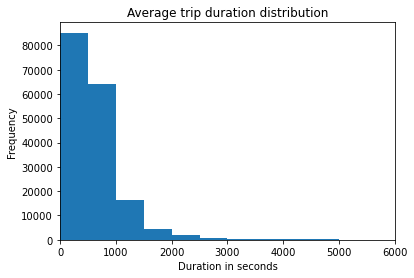

In [26]:
plt.hist(data=df, x='duration_sec', bins=bins)
plt.title('Average trip duration distribution')
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
plt.xlim(0,6000)

> the trip duration is on a average is mostly on the lower side of the x axis which is 'duration in seconds'.
the longest trip is around duration of 5000 (seconds)

> the above visualization it is not concised enough since it's in seconds, let's check further in minutes as this will be clear enough

#### Average trip in minutes

Text(0, 0.5, 'Frequency')

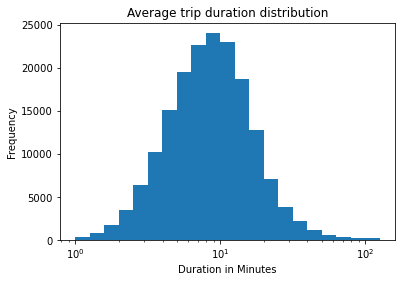

In [27]:
df['duration_min'] = df.duration_sec / 60

bin_edges = 10**np.arange(0, 2+0.2, 0.1)
ticks = [0.1, 0.5, 1, 5, 10, 50, 100, 300]
labels = ['{}'.format(x) for x in ticks]

plt.hist(data=df, x='duration_min', bins=bin_edges)
plt.xticks(ticks, labels)
plt.xscale('log')
plt.title('Average trip duration distribution')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')

> from the above it shows that there's a peak of average trip duration around the 10min area. Meaning majority people use bikes for a short period of time.

### When are most trips taken in terms of time of day, day of the week, or month of the year?

#### Time of day

> In order to do this we need to have column for time of the day extracted from start_time and/or end_time column

In [28]:
# get time of day measured in hour from start_time/end_time column
df['start_time_of_day'] = df.start_time.dt.hour
df['end_time_of_day'] = df.end_time.dt.hour

Text(0, 0.5, 'Frequency')

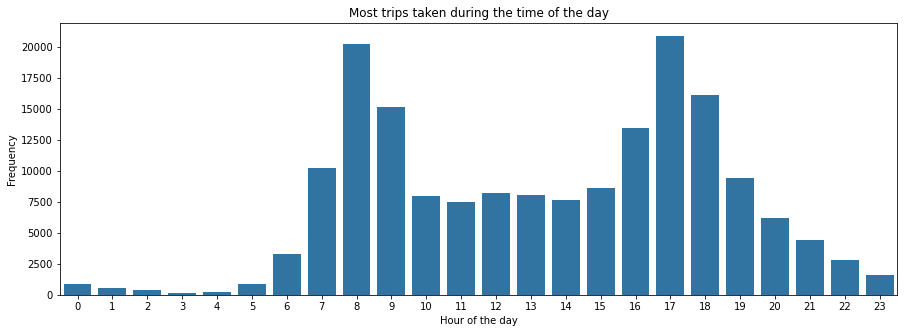

In [29]:
plt.figure(figsize=(15, 5))
plot_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_time_of_day', color=plot_color)
plt.title('Most trips taken during the time of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')

> from the above visualization majority of people like to start their bike trip in the early hour of the day with a peak at 8am. during the mid-day there's a steady equilibrum in the number of trips taken. towards the late hour of the day there's another peak which is by 5pm and slightly high than that of the early hour of the day.

Text(0, 0.5, 'Frequency')

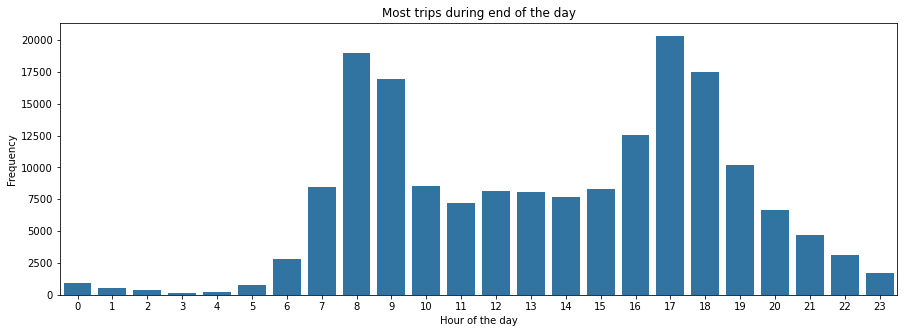

In [30]:
plt.figure(figsize=(15, 5))
plot_color = sb.color_palette()[0]
sb.countplot(data=df, x='end_time_of_day', color=plot_color)
plt.title('Most trips during end of the day')
plt.xlabel('Hour of the day') 
plt.ylabel('Frequency')

> oddly, end time of the day is just slightly different with start time of the day

> from our first answered question 'Average trip in minutes' we found out majority of people don't ride for long (just averagely 10min) which is most likely the reason start time and end time doesn't differ much.

#### Day of the Week

In [31]:
# get day of the week from start_time/end_time column
df['start_day_of_week'] = df.start_time.dt.strftime('%a')
df['end_day_of_week'] = df.end_time.dt.strftime('%a')

<AxesSubplot:xlabel='start_day_of_week', ylabel='count'>

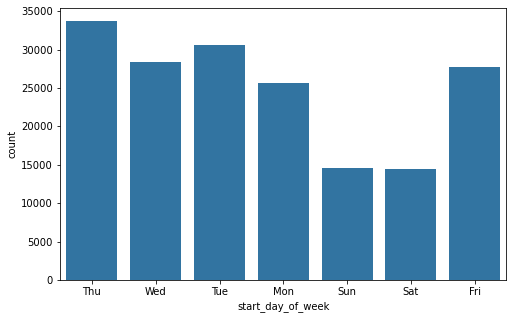

In [32]:
plt.figure(figsize=(8, 5))
plot_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_day_of_week', color=plot_color)

> Most people like going biking on Thursday.

> Weekends (Sun & Sat) appears to have less bike trips than the rest days of the week. Most people don't really like biking during the weekend.

### Does the above depend on if a user is a subscriber or customer? 

In [33]:
subscriber_count = df.query('user_type == "Subscriber"')['bike_id'].count()
subscriber_count

158386

In [34]:
customer_count = df.query('user_type == "Customer"')['bike_id'].count()
customer_count

16566

> looking at the count subscribers are more than customers, but let's visualize this further

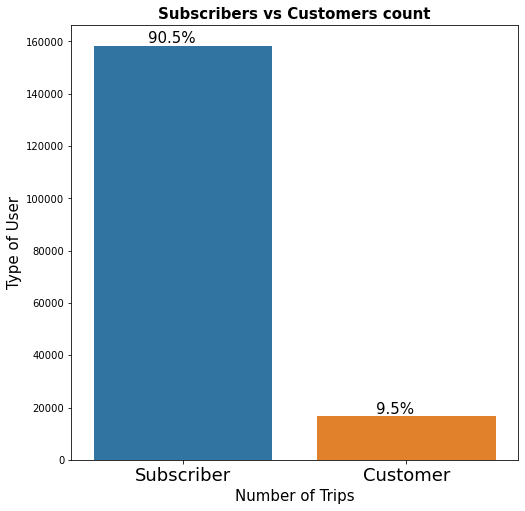

In [35]:
plt.figure(figsize=(8, 8))
ax = sb.countplot(x='user_type', data=df, order=df.user_type.value_counts().index)

# This function is used to change the count plot numbers into percentages
def plot_func(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 15, va='bottom', ha='center')
        plt.title('Subscribers vs Customers count', fontsize=15, fontweight='bold')
        plt.xlabel('Number of Trips', fontsize=15)
        plt.ylabel('Type of User', fontsize=15)
        plt.xticks(size=18)

plot_func(ax, df.user_type)

Text(0.5, 1.0, 'Subscriber vs Customer count')

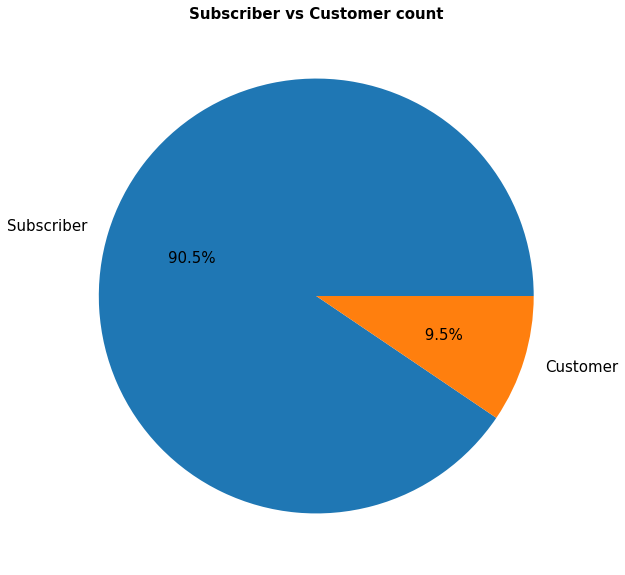

In [36]:
plt.figure(figsize=(10, 10))
labels = ['Subscriber', 'Customer']
size = [subscriber_count / df.bike_id.count(), customer_count / df.bike_id.count()]
plt.pie(size, labels=labels, autopct='%4.1f%%', textprops={'size':15})
plt.title('Subscriber vs Customer count', fontsize=15, fontweight='bold')

> 90.5% of users are Subscribers, while 9.5% of users are Customers.

> The majority of users who uses ford go bike sharing platform are Subscribers.

### Distribution of Age

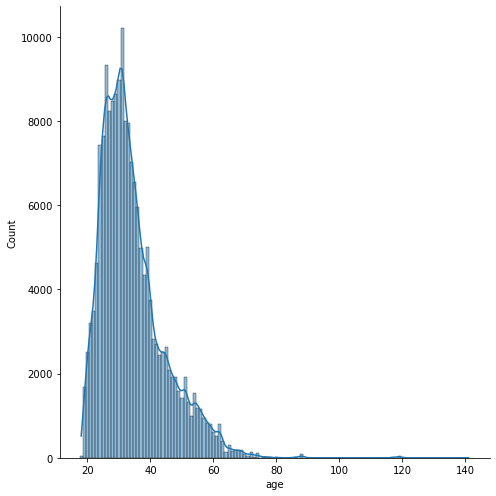

In [37]:
sb.displot(df, x='age', discrete=True, height=7, kde=True, binwidth=10)

In [38]:
# remove outliers from age column (age 90 above)
ids = df[df['age']>90].index
df = df.drop(index=ids)

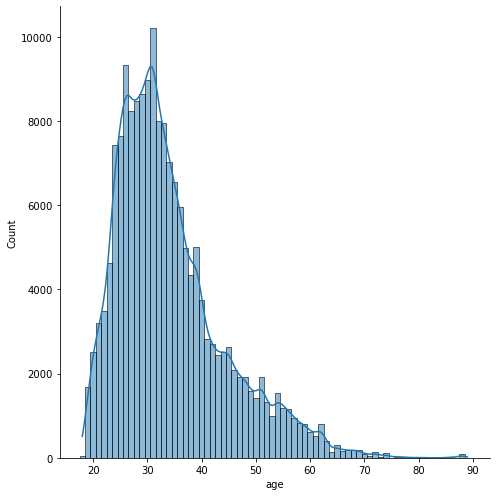

In [39]:
sb.displot(df, x='age', discrete=True, height=7, kde=True, binwidth=10)

> Now that looks better

> From the plot above we can see that the older people get, the leser they ride bikes.

### Gender count

In [40]:
df.member_gender.value_counts()

Male      130439
Female     40791
Other       3645
Name: member_gender, dtype: int64

<AxesSubplot:title={'center':'Gender Counts'}, xlabel='Gender', ylabel='Number of Trips'>

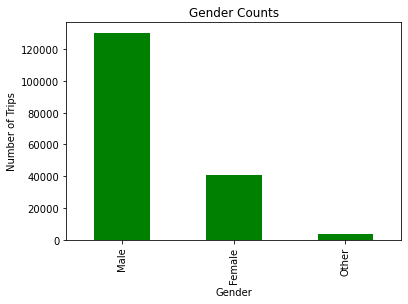

In [41]:
df.member_gender.value_counts().plot(kind='bar', title='Gender Counts', color='green', xlabel='Gender', 
                                     ylabel='Number of Trips')

> The male gender took more trips than female and others.

### Top 10 Most common places for starting a trip

In [42]:
df.start_station_name.value_counts().head(10)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3406
Berry St at 4th St                                           2951
Montgomery St BART Station (Market St at 2nd St)             2709
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2572
San Francisco Ferry Building (Harry Bridges Plaza)           2540
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

<AxesSubplot:>

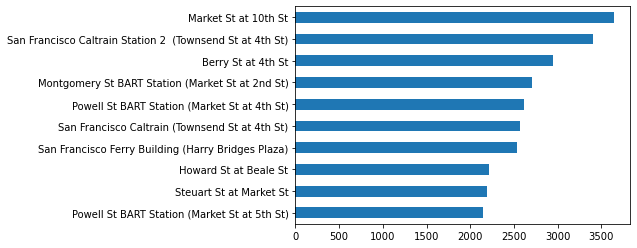

In [43]:
df.start_station_name.value_counts(ascending=True).tail(10).plot.barh()

> 'Market St at 10th St' is where most trips are taken

### Do members like sharing their bike for all trip?

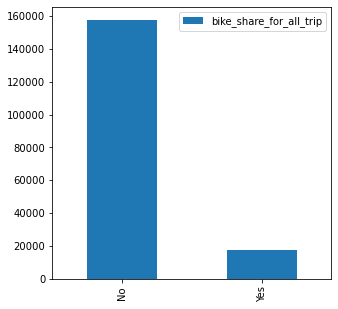

In [44]:
plt.figure(figsize=(5, 5))
df.bike_share_for_all_trip.value_counts().plot(kind='bar')
plt.legend()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distrubution of all my variable of interests were clearly good, there was no unusual points.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When observing the duration_sec variable I had to check for the duration in minutes by converting duration_sec column to minutes. this helped me get a proper view of the visualization.

> Also the age distribution looked off at first had to remove outliers.

## Bivariate Exploration

> In this section I will investigate relationships between pairs of variables in your
data. With a mix of findings gotten from the univariate exploration

### What is the relationship between daily trip for user type?

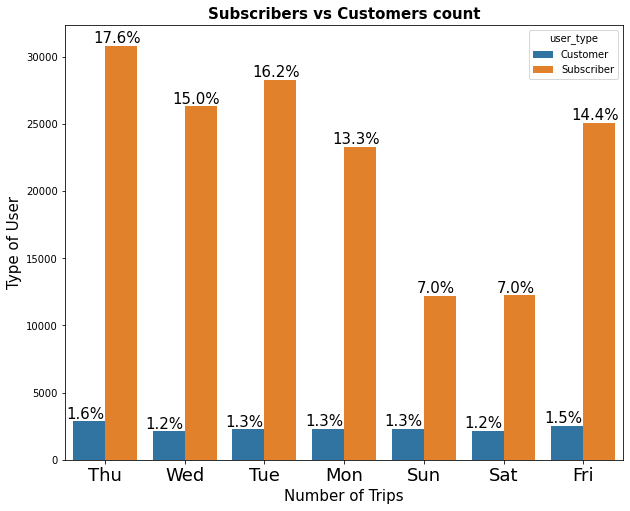

In [45]:
# user type with the start an end day
plt.figure(figsize=(10, 8))
ax = sb.countplot(data=df, x='start_day_of_week', hue='user_type');
plot_func(ax, df.start_day_of_week)

> Subscribers take more daily trips

### Duration and age

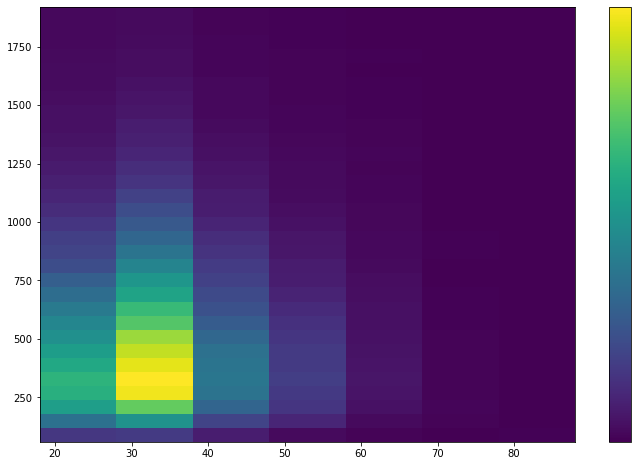

In [46]:
plt.figure(figsize=[12,8])

x_bins = np.arange(18, 90+1, 10)
y_bins = np.arange(60, df.duration_sec.quantile(0.97)+60, 60)
plt.hist2d(data=df,x='age', y='duration_sec',
           bins = [x_bins, y_bins])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

> Looking at the plot it appears that high trip duration is clocked by younger users.

### User Type and gender

<AxesSubplot:xlabel='user_type', ylabel='count'>

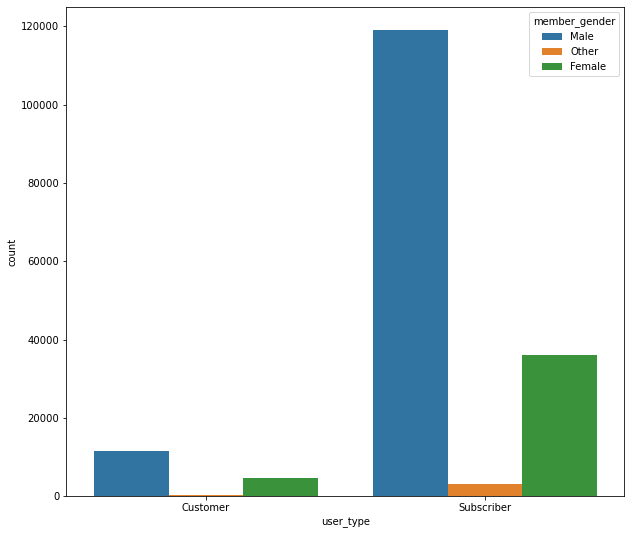

In [47]:
plt.figure(figsize=(10, 9))
sb.countplot(data=df, x='user_type', hue='member_gender')

>  This further shows how subscriber count is more than customer, with Male gender as majority.

### Duration and user type 

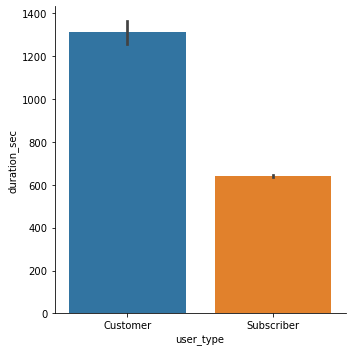

In [48]:
sb.catplot(data=df, x='user_type', y='duration_sec', kind='bar')

> Customers take longer trips than subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers have more daily trips than customers.

> Old aged users don't take long duration of trips.

> Customers take longer trips than subscriber

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There's a slight difference when it comes to the relationship between duration and gender (male and female)

## Multivariate Exploration

### Trip duration across user type in different time of the day.

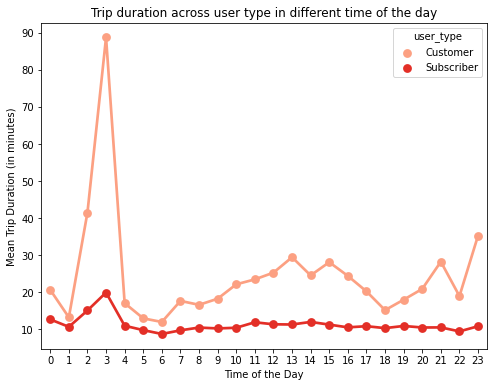

In [49]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df, x = 'start_time_of_day', y = 'duration_min', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duration across user type in different time of the day')
plt.ylabel('Mean Trip Duration (in minutes)')
plt.xlabel('Time of the Day')
plt.show()

> Peak longer trips were in the midnight hours, and mostly by customers.

### Member gender and user trips in diferent day of the week.

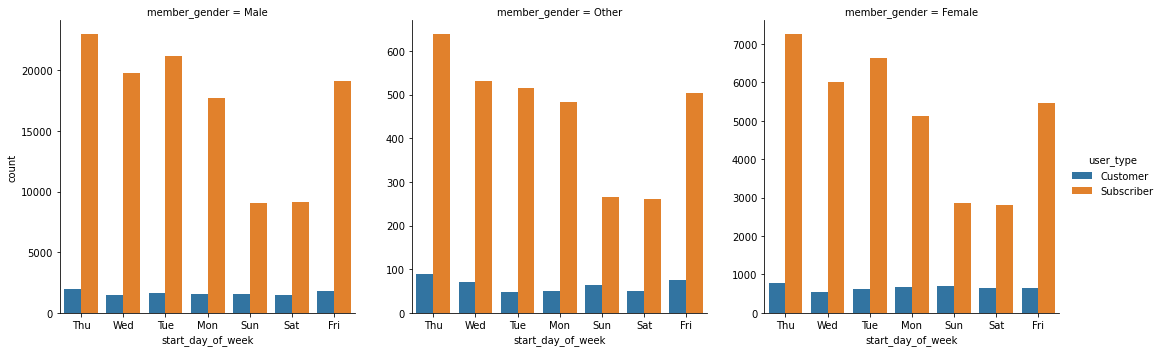

In [50]:
sb.catplot(data=df, x='start_day_of_week', col='member_gender', hue='user_type', kind='count', sharey=False)

> Subscribers have more daily trips with a peak in all gender on Thursday.

### Age and duration with gender

<AxesSubplot:xlabel='age', ylabel='duration_sec'>

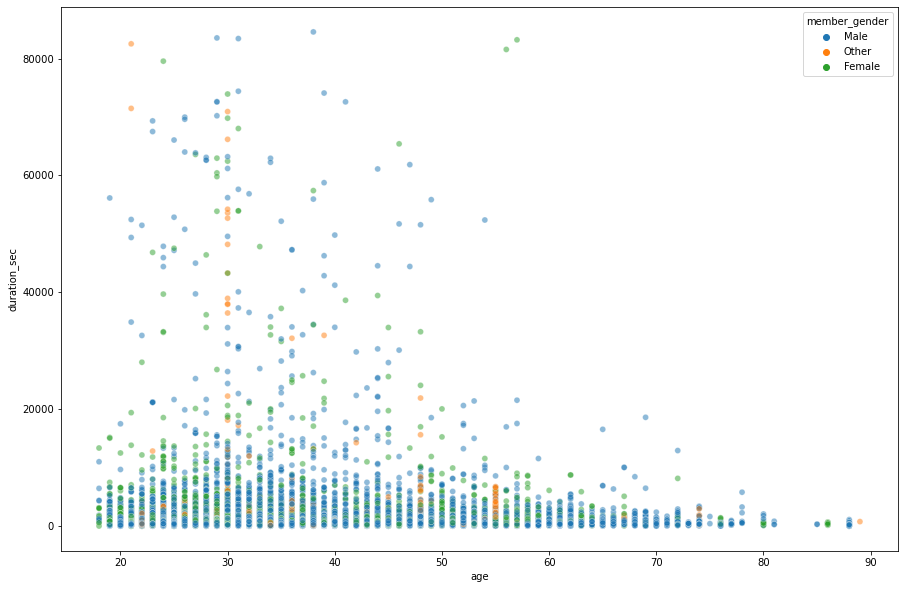

In [51]:
plt.figure(figsize=(15, 10))
sb.scatterplot(data=df,y='duration_sec', x='age', alpha=0.5, hue='member_gender', legend='full')

> There is a high the correlation between the age, duration and gender variable.

### Age and duration with user type

<AxesSubplot:xlabel='age', ylabel='duration_sec'>

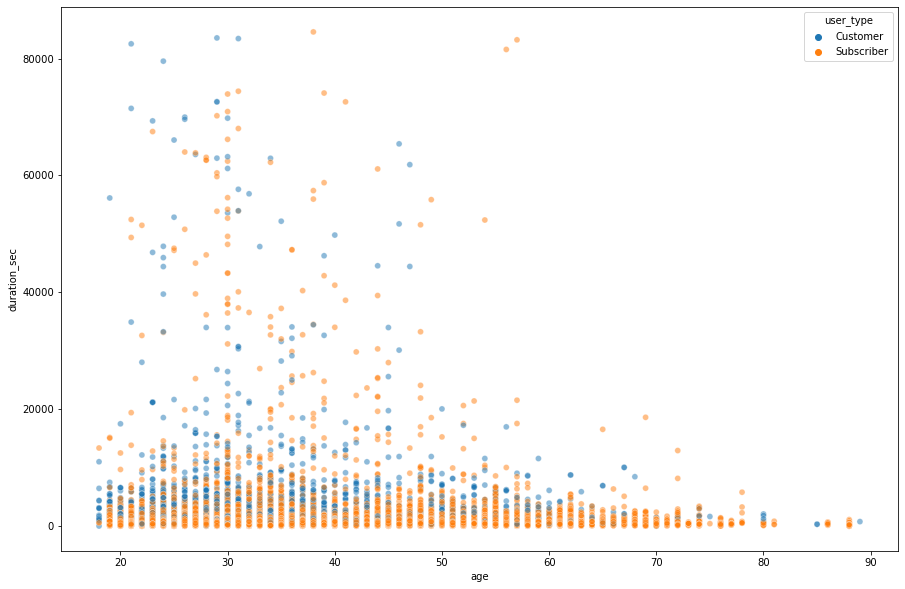

In [52]:
plt.figure(figsize=(15, 10))
sb.scatterplot(data=df,y='duration_sec',x='age', alpha=0.5, hue='user_type', legend='full')

> There is a high the correlation between the age, duration and user type variable.

### Start time of day and duration (in min) with gender and user_type

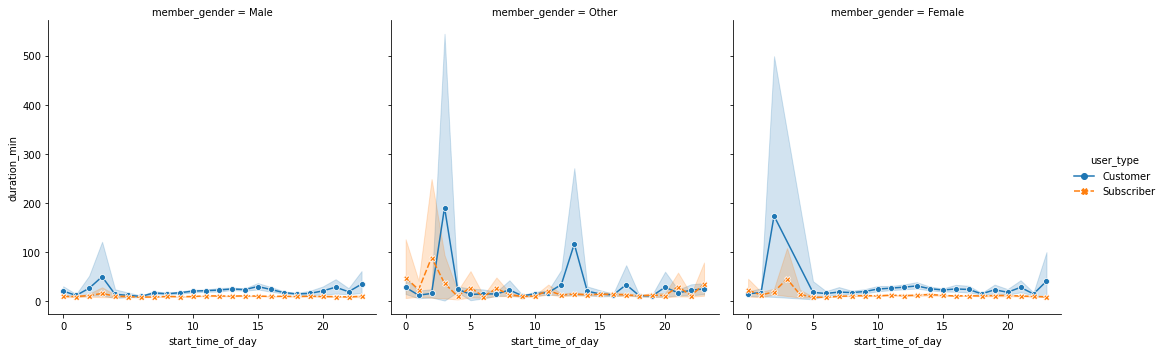

In [53]:
sb.relplot(
    data=df, kind="line",
    x="start_time_of_day", y="duration_min", col="member_gender",
    hue="user_type", style="user_type", markers=True,
)

> Suprisinly, 'other' and 'female' gender category who are customers have longer trips than 'male'... Also they take most of their trips in the early time of the day roughly by 12am - 5am which further proof our 'Trip duration across user type in different time of the day' finding that shows longer trip duration happens in the early hours of the day.¶

In [54]:
df.to_csv('fordgobike-tripdata-clean.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I found out some strong relation when it comes to Duration and user type. Inasmuch as the subscriber counts are way more higher (90%+) than customers. Customers do have higher trip duration. This basically means users are Customers go for longer trips each time they go a ride.

> Member gender and user trips in diferent day of the week: Subscribers have more daily trips with a peak in all gender on Thursday.

### Were there any interesting or surprising interactions between features?

> Average trip duration was just 10 minutes.

> Oddly, end time of the day / start time of the day is just slightly different and this is because the 'Average trip in minutes' is (just averagely 10min) which is most likely the reason start time and end time doesn't differ much.

> Peak longer trips were in the midnight hours, and mostly by customers.

## Conclusions
> Duration and age: Strong correlation with younger people going for longer trips.

> Duration and user type: Customers go for longer trips.

> Member, gender and user trips in diferent day of the week: Customers are more consistent in their day to day ride.

> Peak longer trips were in the midnight hours, and mostly by customers.

> Member gender and user trips in diferent day of the week: Subscribers have more daily trips with a peak in all gender on Thursday.